## Cortes en el mapeo de Jung




In [1]:

using PyPlot
using TaylorSeries
using IntervalArithmetic, IntervalRootFinding
using ValidatedNumerics
using StaticArrays

In [2]:
push!(LOAD_PATH,"/home/evelyn/Documentos/Tesis/Programas/IPM")

3-element Array{Any,1}:
 "/home/evelyn/julia0.6/julia-903644385b/local/share/julia/site/v0.6"
 "/home/evelyn/julia0.6/julia-903644385b/share/julia/site/v0.6"      
 "/home/evelyn/Documentos/Tesis/Programas/IPM"                       

In [3]:

using ParametrizacionMetodo

In [4]:
function Jung(x,y,a)
   
    x_n = x+y
    y_n = y+a*x_n*(x_n-1.)*e^(-x_n)

    return [x_n,y_n]
end

Jung (generic function with 1 method)

In [5]:
function JungI(x,y,a)
   
    y_n = y-a*x*(x-1.)*e^(-x)
    x_n = x -y_n

    return [x_n,y_n]
end

JungI (generic function with 1 method)

In [6]:
jung1(x,y)=Jung(x,y,5.7)
jung2(x,y)=JungI(x,y,5.7)

jung2 (generic function with 1 method)

In [7]:
Orden = 86 #orden del polinomio
#a = parse(BigFloat,"3.4") #por si queremos hacerlo con bigfloat
#x_f = parse(BigFloat,"1.")
#y_f= parse(BigFloat,"0.")
x_fijo = [1.,0.] #punto fijo
tiempo = [0.,3.] #tiempo de evaluación del parámetro
delta_t = tiempo[2]/100. #variación del parámetro

W_e, f_e, vec_e, val_e = Inestable(jung2, Orden, x_fijo, tiempo, delta_t) #estable 
W_i, f_i, vec_i, val_i = Inestable(jung1, Orden , x_fijo, tiempo, delta_t) #inestable

(TaylorSeries.Taylor1{Float64}[ 1.0 - 0.8041001387257923 t - 1.9109284365472363e-17 t² + 0.010407195402439237 t³ + 0.0013751833151210374 t⁴ + 8.097546458024914e-5 t⁵ + 3.0440951268470024e-7 t⁶ - 3.6214834065664494e-7 t⁷ - 3.276100477753219e-8 t⁸ - 1.3362785801344348e-9 t⁹ + 7.134305448117721e-12 t¹⁰ + 4.79147169857471e-12 t¹¹ + 3.326590857799233e-13 t¹² + 1.0544646415326426e-14 t¹³ - 1.3671766912330883e-16 t¹⁴ - 3.5652016177246974e-17 t¹⁵ - 2.057779350543761e-18 t¹⁶ - 5.3576153150522126e-20 t¹⁷ + 1.0605335418626865e-21 t¹⁸ + 1.8020516517927443e-22 t¹⁹ + 9.059384408478532e-24 t²⁰ + 2.000659779781243e-25 t²¹ - 5.244166699557533e-27 t²² - 6.853547235348495e-28 t²³ - 3.091162933216977e-29 t²⁴ - 5.9138992425884096e-31 t²⁵ + 1.9173286152727283e-32 t²⁶ + 2.0879359364280215e-33 t²⁷ + 8.62159439955002e-35 t²⁸ + 1.4507001173460105e-36 t²⁹ - 5.589684875579797e-38 t³⁰ - 5.312323550631483e-39 t³¹ - 2.037841204466596e-40 t³² - 3.050713843813444e-42 t³³ + 1.3606788135585376e-43 t³⁴ + 1.16260379935035

Las vemos graficadas en el espacio fase

In [70]:
function evaluar(Tiempo, paso,A,B,PuntoFijo,col) #función para evaluar los polinomios y graficarlos
    ValX=Float64[]
    
    ValY=Float64[]
    push!(ValX, PuntoFijo[1]) 
    push!(ValY, PuntoFijo[2])

    for t = Tiempo[1]:paso:Tiempo[2]
        #x=A(t)
        #y=B(t)
        x = evaluate(A,t)
        y = evaluate(B,t)
        
        push!(ValX,x)
        push!(ValY,y)
        
    end
    p = plot(ValX,ValY,linestyle="-",marker =",",color=col)
    #title("Espacio Fase")
    legend(loc="upper right",fancybox="true")
    grid("on")
    xlim(-2,2.)
    ylim(-2,2)
    
end

evaluar (generic function with 1 method)

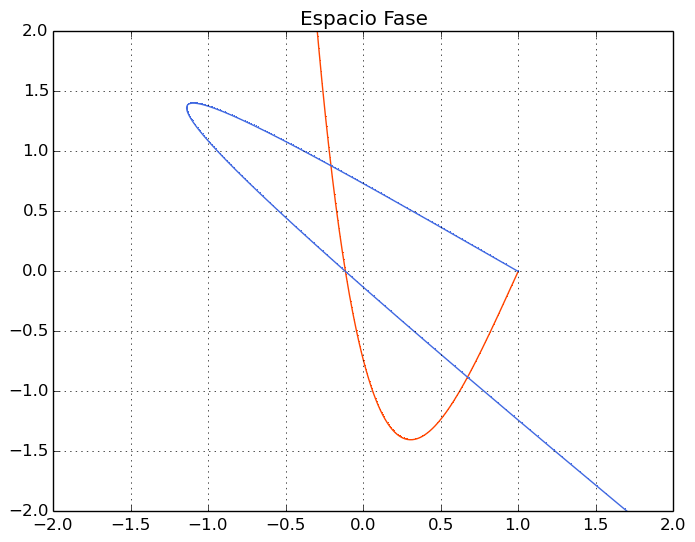

(-2, 2)

In [53]:
evaluar([-.1,-4.4], -0.025,  W_e[1],W_e[2],[1.,0.],"orangered")#graficamos en el espacio fase ## -15
evaluar([.1,7.0], 0.025,  W_i[1],W_i[2],[1.,0.],"royalblue") ##23

In [10]:
#calculamos el error

ErrorE = CalculoError(jung2, W_e,f_e,[0.1,20.4],0.025 )# recibe la función, las variedades, el intervalo de evaluación
#del parámetro y el paso
ErrorI = CalculoError(jung1, W_i,f_i,[0.1,27.],0.025 )


Pol_vec = TaylorSeries.Taylor1{Float64}[ 1.0 + 0.3325166619301202 t - 0.0007359419070784524 t³ + 4.0213668594736015e-5 t⁴ - 9.791964344952789e-7 t⁵ + 1.5222215640067612e-9 t⁶ + 7.488751588402085e-10 t⁷ - 2.8014534674502205e-11 t⁸ + 4.725268401492648e-13 t⁹ + 1.0432405259835982e-15 t¹⁰ - 2.897376627637656e-16 t¹¹ + 8.318378738235355e-18 t¹² - 1.0903717623696732e-19 t¹³ - 5.846157236885156e-22 t¹⁴ + 6.304247045888206e-23 t¹⁵ - 1.504704493951844e-24 t¹⁶ + 1.6200449936102489e-26 t¹⁷ + 1.326119387393755e-28 t¹⁸ - 9.318168845769636e-30 t¹⁹ + 1.937100394656254e-31 t²⁰ - 1.7692200447292266e-33 t²¹ - 1.9175862595193613e-35 t²² + 1.0362253540157716e-36 t²³ - 1.9334332956109122e-38 t²⁴ + 1.5568289573554088e-40 t²⁵ + 1.9692032942739532e-42 t²⁶ - 1.4479435987308477e-43 t²⁷ - 1.8099294984135595e-45 t²⁸ + 5.656029682542373e-47 t²⁹ - 2.761733243428893e-50 t³² + 8.23060644694833e-58 t³⁸ + 6.430161286678382e-60 t⁴⁰ + 6.279454381521858e-63 t⁴² - 4.905823735563951e-65 t⁴⁴ - 9.581686983523342e-68 t⁴⁶ + 5.9

Pol_vec = TaylorSeries.Taylor1{Float64}[ 1.0 - 0.8041001387257923 t - 1.9109284365472363e-17 t² + 0.010407195402439237 t³ + 0.0013751833151210374 t⁴ + 8.097546458024914e-5 t⁵ + 3.0440951268470024e-7 t⁶ - 3.6214834065664494e-7 t⁷ - 3.276100477753219e-8 t⁸ - 1.3362785801344348e-9 t⁹ + 7.134305448117721e-12 t¹⁰ + 4.79147169857471e-12 t¹¹ + 3.326590857799233e-13 t¹² + 1.0544646415326426e-14 t¹³ - 1.3671766912330883e-16 t¹⁴ - 3.5652016177246974e-17 t¹⁵ - 2.057779350543761e-18 t¹⁶ - 5.3576153150522126e-20 t¹⁷ + 1.0605335418626865e-21 t¹⁸ + 1.8020516517927443e-22 t¹⁹ + 9.059384408478532e-24 t²⁰ + 2.000659779781243e-25 t²¹ - 5.244166699557533e-27 t²² - 6.853547235348495e-28 t²³ - 3.091162933216977e-29 t²⁴ - 5.9138992425884096e-31 t²⁵ + 1.9173286152727283e-32 t²⁶ + 2.0879359364280215e-33 t²⁷ + 8.62159439955002e-35 t²⁸ + 1.4507001173460105e-36 t²⁹ - 5.589684875579797e-38 t³⁰ - 5.312323550631483e-39 t³¹ - 2.037841204466596e-40 t³² - 3.050713843813444e-42 t³³ + 1.3606788135585376e-43 t³⁴ + 1.16260

Map_vec = TaylorSeries.Taylor1{Float64}[ 1.0 - 0.20960626415586747 t - 1.298472224844911e-18 t² + 0.00018433850896149712 t³ + 6.349464165474614e-6 t⁴ + 9.745947125677334e-8 t⁵ + 9.550430376433566e-11 t⁶ - 2.961729173002661e-11 t⁷ - 6.984095626422692e-13 t⁸ - 7.425814419789373e-15 t⁹ + 1.0334581735788509e-17 t¹⁰ + 1.8092736287073667e-18 t¹¹ + 3.274378157555947e-20 t¹² + 2.705550140853098e-22 t¹³ - 9.144128761042704e-25 t¹⁴ - 6.215783280370297e-26 t¹⁵ - 9.352007661153315e-28 t¹⁶ - 6.347046576473965e-30 t¹⁷ + 3.275058916758185e-32 t¹⁸ + 1.4506305585757521e-33 t¹⁹ + 1.9010682388673445e-35 t²⁰ + 1.0939903479820703e-37 t²¹ - 7.475983359111472e-40 t²² - 2.5470000887567875e-41 t²³ - 3.0828566215145976e-43 t²⁴ - 1.401298464324817e-45 t²⁵ + 1.642146637880645e-47 t²⁶ + 3.4211388289180104e-49 t²⁷ - 1.6704779438076223e-52 t²⁹ + 1.044048714879764e-53 t³⁰ + 1.9913648889155653e-59 t³⁴ - 1.2154326714572542e-63 t³⁷ + 4.7477838728798994e-66 t³⁹ + 1.1591269220898192e-69 t⁴¹ - 4.527839539413356e-72 t⁴³ - 2

2-element Array{Array{Float64,1},1}:
 [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325  …  26.775, 26.8, 26.825, 26.85, 26.875, 26.9, 26.925, 26.95, 26.975, 27.0]                                                                                  
 [1.94307e-17, 2.42897e-17, 2.91495e-17, 3.40104e-17, 3.88724e-17, 4.37358e-17, 4.86007e-17, 5.34672e-17, 5.83356e-17, 6.3206e-17  …  1920.78, 2080.81, 2254.0, 2441.4, 2644.18, 2863.58, 3100.95, 3357.72, 3635.48, 3935.9]

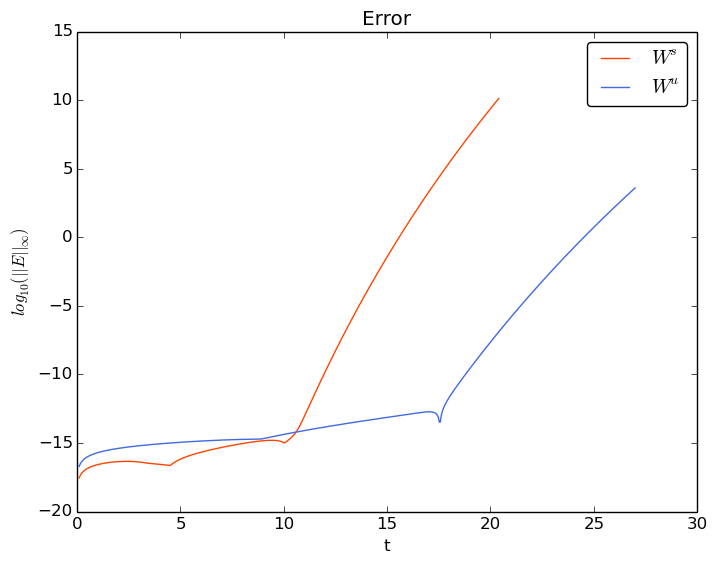

/usr/lib/pymodules/python2.7/matplotlib/legend.py:317: UserWarning: Unrecognized location "low right". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(self.codes.iterkeys())))


PyObject <matplotlib.legend.Legend object at 0x7f55ede74c90>

In [11]:
#graficamos el error
plot(ErrorE[1],log10.(ErrorE[2]),marker= "None", label=L"W^{s}",color="orangered")
plot(ErrorI[1],log10.(ErrorI[2]),marker= "None", label=L"W^{u}",color="royalblue")

xlabel("t")
ylabel(L"$log_{10}(|| E||_{\infty})$")
title("Error")
#grid("on")
legend(loc="low right",fancybox="true" )

In [12]:
#para calcular la intersección
function Interseccion(p)
    (x,y)=p
    V=SVector(( W_e[1](x)-W_i[1](y), W_e[2](x)-W_i[2](y) ))

end

Interseccion (generic function with 1 method)

In [54]:
X = (-4.0..(-0.1))×(0.1..7.0) # 2D IntervalBox;

In [55]:
Interseccion(X)

2-element StaticArrays.SArray{Tuple{2},IntervalArithmetic.Interval{Float64},1,2}:
 [-3.96529, 5.59618]
 [-7.93146, 5.92955]

In [59]:
@time(
r=roots(Interseccion,X, Newton,1e-4))

  0.133250 seconds (6.60 k allocations: 329.014 KiB)


3-element Array{IntervalRootFinding.Root{IntervalArithmetic.IntervalBox{2,Float64}},1}:
 Root([-0.985068, -0.985067] × [5.99488, 5.99489], :unique)
 Root([-3.46215, -3.46214] × [5.49229, 5.4923], :unique)   
 Root([-3.77896, -3.77895] × [1.56269, 1.5627], :unique)   

In [76]:
nombre = ["a","b","c","d","e","f","g","h"]
for ind in eachindex(r)
    plot(W_e[1].([r[ind].interval[1].lo, r[ind].interval[1].hi]), 
         W_e[2].([r[ind].interval[1].lo, r[ind].interval[1].hi]), "o") #, label=nombre[ind])
end
#legend(loc="lower right",fancybox="true" )

evaluar([-.1,-4.4], -0.025,  W_e[1],W_e[2],[1.,0.],"orangered")#graficamos en el espacio fase ## -15
evaluar([.1,7.0], 0.025,  W_i[1],W_i[2],[1.,0.],"royalblue") ##23

(-2, 2)

In [78]:
intervaloX = hull(W_e[1](r[3].interval[1]),W_i[1](r[3].interval[2]))
intervaloY = hull(W_e[2](r[3].interval[1]),W_i[2](r[3].interval[2]))

[0.881091, 0.881092]

In [79]:
delta1 =r[3].interval[1].lo/1000
delta2 =r[3].interval[2].lo/1000

evaluar([0.,r[3].interval[1].hi+delta1], delta1 , W_e[1],W_e[2],x_fijo,"orangered")
evaluar([0.,r[3].interval[2].hi+delta2], delta2, W_i[1],W_i[2],x_fijo,"royalblue")
plot([intervaloX.lo,intervaloX.hi,intervaloX.hi,intervaloX.lo],
    [intervaloY.lo,intervaloY.lo,intervaloY.hi,intervaloY.hi],"o",linestyle="-",color="red")

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f55e8d34790>

In [65]:
using PyPlot
using PyCall
@pyimport matplotlib.patches as patch

In [80]:
pygui(true)
cfig = figure()
evaluar([0.,r[3].interval[1].hi+2delta1], delta1, W_e[1],W_e[2],[1.,0.],"orangered")
evaluar([0.,r[3].interval[2].hi+delta2], delta2 , W_i[1],W_i[2],[1.,0.],"royalblue")
xx=intervaloX.lo
yy=intervaloY.lo
diam_x = intervaloX.hi-intervaloX.lo
diam_y = intervaloY.hi-intervaloY.lo
#plot([intervaloX.lo,intervaloX.hi,intervaloX.hi,intervaloX.lo],
 #   [intervaloY.lo,intervaloY.lo,intervaloY.hi,intervaloY.hi],"o")
ax = cfig[:add_subplot](1,1,1)
ax[:set_aspect]("equal")
c = patch.Rectangle([xx,yy],diam_x,diam_y,fc="red",ec="black",linewidth=.5,alpha = 0.5)
ax[:add_artist](c)
#cfig[:savefig]("cruce1.png")
grid("on")
xlim(xx-diam_x,intervaloX.hi+diam_x)
ylim(yy-diam_x,intervaloY.hi+diam_x)
xlabel(L"x")
ylabel(L"y")
#grid("on")
#legend(loc="low right",fancybox="true" )

PyObject <matplotlib.text.Text object at 0x7f55e8f77a50>

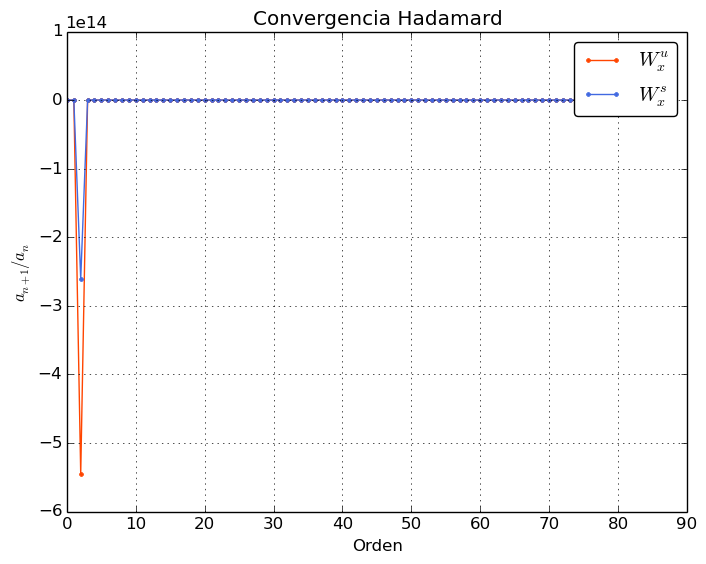

PyObject <matplotlib.legend.Legend object at 0x7fcf6421c650>

In [72]:
plot(cU[1],marker=".",label=L"W^{u}_{x}",color="orangered")
plot(cS[1],marker=".",label=L"W^{s}_{x}",color="royalblue")
xlabel("Orden")
ylabel(L"a_{n+1}/a_{n}")
title("t")
grid("on")
title("Convergencia Hadamard")
legend(loc="upper right",fancybox="true" )

In [67]:
cU3=Convergencia3(W_u[1],W_u[2])# convergencia de tres términos
cS3=Convergencia3(W_s[1],W_s[2])

(Any[0.332517, 7.81977e14, 7.81977e14, 0.0968206, 0.112422, 3.45306, 3.743, 0.147466, 0.173883, 3.07709  …  0.607963, 3.65349, 5.16434, 0.875566, 0.634888, 3.98113, 5.5435, 0.900074, 0.661562, 4.31089], Any[2.1077e15, 2.1077e15, 0.26232, 0.345084, 11.3562, 12.331, 0.486964, 0.593888, 10.7306, 9.44282  …  2.30147, 13.8358, 19.5587, 3.31586, 2.40502, 15.0862, 21.0079, 3.41082, 2.50759, 16.3452])

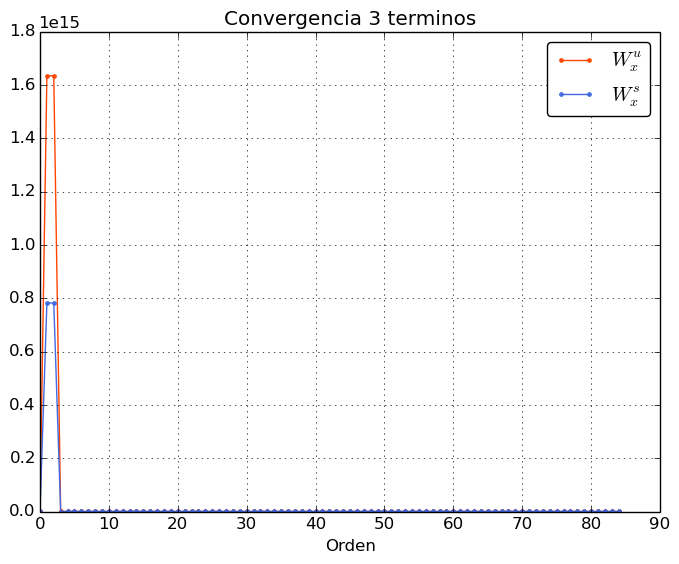

PyObject <matplotlib.legend.Legend object at 0x7fcf64280a50>

In [71]:
plot(cU3[1],marker=".",label=L"W^{u}_{x}",color="orangered")
plot(cS3[1],marker=".",label=L"W^{s}_{x}",color="royalblue")
xlabel("Orden")
#ylabel(L"a_{n+1}/a_{n}")
title("t")
grid("on")
title("Convergencia 3 terminos")
legend(loc="upper right",fancybox="true" )

## Otro parámetro

In [50]:
xfijo=[1.,0.]
Orden2 = 71
a2= 6.2
jung2(x,y)=Jung(x,y,a2)
tiempo = [-3.,4.]
delta_t = 0.125
U1,fU1,u1,v1 = Inestable(jung2,Orden2,xfijo,tiempo, delta_t)
A1,fS1,us1,vs1 =Estable(jung2,Orden2,xfijo,tiempo, delta_t)

M = [1.0 1.0; 2.28085 3.28085]
ValsOrden_aux = [0.247961, 4.03289]
EigVec_aux = [-0.799217 -0.313136; 0.601042 -0.949708]
"a" = "a"
M = [1.0 1.0; 2.28085 3.28085]
ValsOrden_aux = [0.247961, 4.03289]
EigVec_aux = [-0.799217 -0.313136; 0.601042 -0.949708]


(TaylorSeries.Taylor1{Float64}[ 1.0 - 0.3131362338145256 t + 2.2669184653344663e-18 t² + 0.0005709802826942577 t³ + 2.808811238948525e-5 t⁴ + 6.275850777086839e-7 t⁵ + 2.07949226422173e-9 t⁶ - 3.2479108641235413e-10 t⁷ - 1.1394432007206349e-11 t⁸ - 1.8142448497948764e-13 t⁹ - 9.684744869543144e-17 t¹⁰ + 7.222223693616987e-17 t¹¹ + 1.965824457707288e-18 t¹² + 2.4936632475974126e-20 t¹³ - 3.952149435541797e-23 t¹⁴ - 9.037153066440897e-24 t¹⁵ - 2.0594718585371505e-25 t¹⁶ - 2.2054574893828585e-27 t¹⁷ + 7.149755406231024e-30 t¹⁸ + 7.652764754388032e-31 t¹⁹ + 1.5307537527673126e-32 t²⁰ + 1.435497535523403e-34 t²¹ - 6.537813890359475e-37 t²² - 4.855750582276757e-38 t²³ - 8.793934720484271e-40 t²⁴ - 7.414097740361514e-42 t²⁵ + 4.1379663809611466e-44 t²⁶ + 2.4584079258184712e-45 t²⁷ + 4.119591166423182e-47 t²⁸ + 3.1871366481122623e-49 t²⁹ - 2.0255248161151883e-51 t³⁰ - 1.0357886107235254e-52 t³¹ - 1.631912531716574e-54 t³² - 1.178142372673331e-56 t³³ + 8.129186694758826e-59 t³⁴ + 3.741521546428

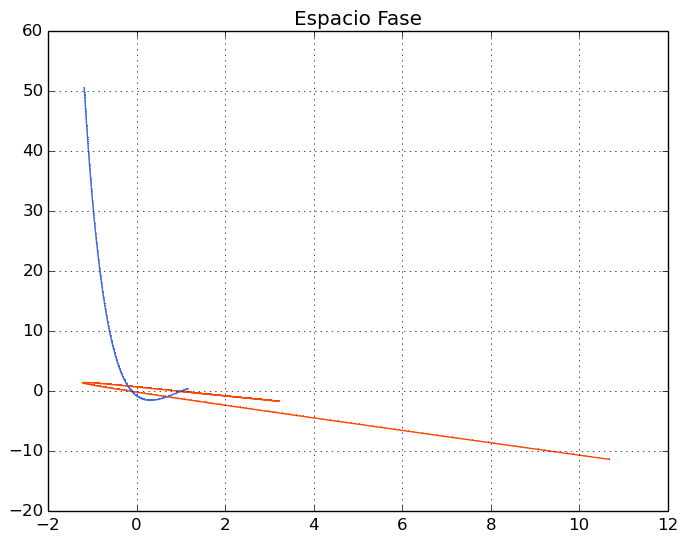

In [53]:
evaluar([-3.,9.], 0.025,  U1[1],U1[2],[1.,0.],"orangered")
evaluar([-0.5,9.], 0.025,  A1[1],A1[2],[1.,0.],"royalblue")

## Cuidado!! esto genera las gráficas del error con respecto al orden, tardan un poco...

In [ ]:
O1 = 20
O2 = 36
O3 = 45
O4 = 58
O5 = 70
O6 = 89
O7 = 100
O8 = 150
O9 = 163
#O10 = 77
x_fijo = [big(0.),big(0.)] a

tiempo = [-big(3.),big(3.)]
delta_t = big(0.125)
W1, f1, vec1, val1 = Inestable(g_estandar,O1 , x_fijo,tiempo, delta_t)
W2, f2, vec2, val2 = Inestable(g_estandar,O2 , x_fijo,tiempo, delta_t)
W3, f3, vec3, val3 = Inestable(g_estandar,O3 , x_fijo,tiempo, delta_t)
W4, f4, vec4, val4 = Inestable(g_estandar,O4 , x_fijo,tiempo, delta_t)
W5, f5, vec5, val5 = Inestable(g_estandar,O5 , x_fijo,tiempo, delta_t)
W6, f6, vec6, val6 = Inestable(g_estandar,O6 , x_fijo,tiempo, delta_t)
W7, f7, vec7, val7 = Inestable(g_estandar,O7 , x_fijo,tiempo, delta_t)
W8, f8, vec8, val8 = Inestable(g_estandar,O8 , x_fijo,tiempo, delta_t)
W9, f9, vec9, val9 = Inestable(g_estandar,O9 , x_fijo,tiempo, delta_t)
#W10, f10, vec10, val10 = Inestable(g_estandar,O10 , x_fijo,tiempo, delta_t)

In [ ]:
Tiempo = [big(0.),big(9.)]
Error1A = CalculoError(g_estandar, W1,f1,Tiempo,big(0.025) )
Error2A = CalculoError(g_estandar, W2,f2,Tiempo,big(0.025 ))
Error3A = CalculoError(g_estandar, W3,f3,Tiempo,big(0.025 ))
Error4A = CalculoError(g_estandar, W4,f4,Tiempo,big(0.025 ))
Error5A = CalculoError(g_estandar, W5,f5,Tiempo,big(0.025 ))
Error6A = CalculoError(g_estandar, W6,f6,Tiempo,big(0.025 ))
Error7A = CalculoError(g_estandar, W7,f7,Tiempo,0.025 )
#Error8A = CalculoError(g_estandar, W8,f8,Tiempo,big(0.025 ))
#Error9A = CalculoError(g_estandar, W9,f9,Tiempo,big(0.025 ))
#Error10A = CalculoError(f_estandar1, W10,f10,Tiempo,0.025 )



In [ ]:
plot(Error1A[1],log10(Error1A[2]),marker= "None", label="$O1")
plot(Error2A[1],log10(Error2A[2]),marker= "None", label="$O2")
plot(Error3A[1],log10(Error3A[2]),marker= "None", label="$O3")
plot(Error4A[1],log10(Error4A[2]),marker= "None", label="$O4")
plot(Error5A[1],log10(Error5A[2]),marker= "None", label="$O5")
plot(Error6A[1],log10(Error6A[2]),marker= "None", label="$O6")
#plot(Error7A[1],log10(Error7A[2]),marker= "None", label="$O7")
#plot(Error8A[1],log10(Error8A[2]),marker= "None", label="$O8")
#plot(Error9A[1],log10(Error9A[2]),marker= "None", label="$O9")
#plot(Error10A[1],log10(Error10A[2]),marker= "None", label="$O10")


xlabel("t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error")
#grid("on")
#ylim(-16.,-15.2)
legend(loc="low right",fancybox="true")

In [ ]:
O1 = 20
O2 = 10
O3 = 30
O4 = 40
O5 = 25
O6 = 28
x_fijo = [0.,0.] 
tiempo = [-3.,3.]
delta_t = 0.125
V1, h1, vec1, val1 = Estable(f_estandar1,O1 , x_fijo,tiempo, delta_t)
V2, h2, vec2, val2 = Estable(f_estandar1,O2 , x_fijo,tiempo, delta_t)
V3, h3, vec3, val3 = Estable(f_estandar1,O3 , x_fijo,tiempo, delta_t)
V4, h4, vec4, val4 = Estable(f_estandar1,O4 , x_fijo,tiempo, delta_t)
V5, h5, vec5, val5 = Estable(f_estandar1,O5 , x_fijo,tiempo, delta_t)
V6, h6, vec6, val6 = Estable(f_estandar1,O6 , x_fijo,tiempo, delta_t)

In [ ]:
Tiempo = [0.,5.]
Error1A = CalculoError(f_estandar1, V1,h1,Tiempo,0.025 )
Error2A = CalculoError(f_estandar1, V2,h2,Tiempo,0.025 )
Error3A = CalculoError(f_estandar1, V3,h3,Tiempo,0.025 )
Error4A = CalculoError(f_estandar1, V4,h4,Tiempo,0.025 )
Error5A = CalculoError(f_estandar1, V5,h5,Tiempo,0.025 )
Error6A = CalculoError(f_estandar1, V6,h6,Tiempo,0.025 )



In [ ]:
plot(Error1A[1],log10(Error1A[2]),marker= "None", label="$O1")
plot(Error2A[1],log10(Error2A[2]),marker= "None", label="$O2")
plot(Error3A[1],log10(Error3A[2]),marker= "None", label="$O3")
plot(Error4A[1],log10(Error4A[2]),marker= "None", label="$O4")
plot(Error5A[1],log10(Error5A[2]),marker= "None", label="$O5")
plot(Error6A[1],log10(Error6A[2]),marker= "None", label="$O6")


xlabel("Parámetro t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error")
#grid("on")
#ylim(-16.,-15.2)
legend(loc="low right",fancybox="true" )